In [ ]:
import pandas as pd
df = pd.read_csv("heart_cleaned_final.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,ComorbidityCount,UnhealthyDays,RiskBehavior,SleepCategory
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,Very good,5.0,1,0,1,3,30.0,1,Very Short
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1,Very good,7.0,0,0,0,1,0.0,0,Normal
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,Fair,8.0,1,0,0,2,30.0,1,Normal
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,0,Good,6.0,0,0,1,1,0.0,0,Short
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1,Very good,8.0,0,0,0,0,28.0,0,Normal


In [ ]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,ComorbidityCount,UnhealthyDays,RiskBehavior,SleepCategory
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,...,1,Very good,5.0,1,0,1,3,30.0,1,Very Short
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,...,1,Very good,7.0,0,0,0,1,0.0,0,Normal
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,...,1,Fair,8.0,1,0,0,2,30.0,1,Normal
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,...,0,Good,6.0,0,0,1,1,0.0,0,Short
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,...,1,Very good,8.0,0,0,0,0,28.0,0,Normal


In [ ]:
# Core data tools
import pandas as pd
import numpy as np
import pickle

# Neural Network from TensorFlow (Keras)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Evaluation tools
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("heart_cleaned_final.csv")

# Load the pre-split data
X_train = pickle.load(open("X_train.p", "rb"))
X_test = pickle.load(open("X_test.p", "rb"))
y_train = pickle.load(open("y_train.p", "rb"))
y_test = pickle.load(open("y_test.p", "rb"))


In [ ]:
# Define the model architecture
baseline_model = Sequential()
baseline_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
baseline_model.add(Dense(32, activation='relu'))
baseline_model.add(Dense(1, activation='sigmoid'))  # Final layer: probability of heart disease

# Compile the model
baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


c:\Users\modyx\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Fit the model
baseline_history = baseline_model.fit(X_train, y_train,
                                      epochs=30,
                                      batch_size=32,
                                      validation_split=0.2,
                                      verbose=1)


Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9083 - loss: 0.2832 - val_accuracy: 0.9145 - val_loss: 0.2336
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9103 - loss: 0.2438 - val_accuracy: 0.9130 - val_loss: 0.2310
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9123 - loss: 0.2353 - val_accuracy: 0.9145 - val_loss: 0.2321
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9108 - loss: 0.2415 - val_accuracy: 0.9091 - val_loss: 0.2393
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9114 - loss: 0.2371 - val_accuracy: 0.9149 - val_loss: 0.2308
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9123 - loss: 0.2351 - val_accuracy: 0.9165 - val_loss: 0.2376
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9145 - loss: 0.2299 - val_accuracy: 0.9161 - val_loss: 0.2295
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9125 - loss: 0.2345 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step
📊 Classification Report (Baseline):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9174
           1       0.48      0.15      0.23       826

    accuracy                           0.92     10000
   macro avg       0.70      0.57      0.59     10000
weighted avg       0.89      0.92      0.90     10000



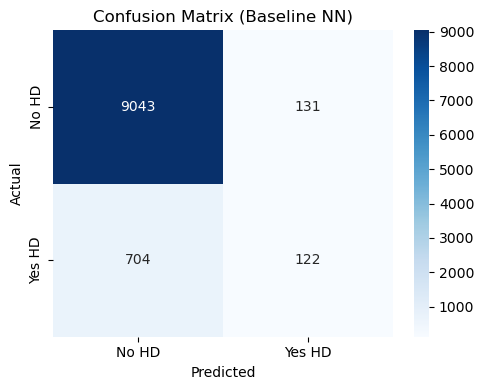

In [ ]:
# Predict class probabilities and convert to 0/1
y_pred_prob = baseline_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Classification report
print("📊 Classification Report (Baseline):")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No HD", "Yes HD"], yticklabels=["No HD", "Yes HD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Baseline NN)")
plt.tight_layout()
plt.show()


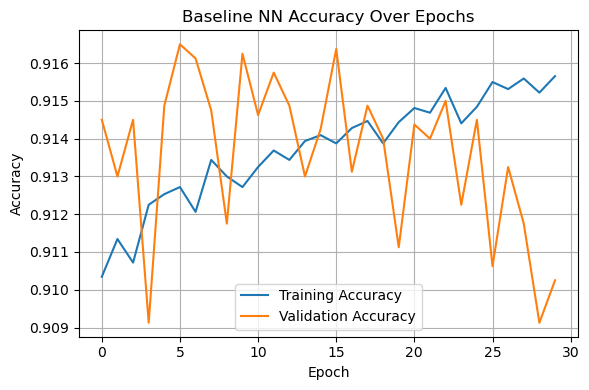

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(baseline_history.history['accuracy'], label='Training Accuracy')
plt.plot(baseline_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Baseline NN Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
weights = class_weight.compute_class_weight(class_weight='balanced',
                                             classes=np.unique(y_train),
                                             y=y_train)
class_weights = {0: weights[0], 1: weights[1]}
print("Class Weights:", class_weights)


Class Weights: {0: 0.5483358008444371, 1: 5.672149744753262}


In [ ]:
weighted_model = Sequential()
weighted_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
weighted_model.add(Dense(32, activation='relu'))
weighted_model.add(Dense(1, activation='sigmoid'))

weighted_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


c:\Users\modyx\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
weighted_history = weighted_model.fit(X_train, y_train,
                                      epochs=30,
                                      batch_size=32,
                                      validation_split=0.2,
                                      class_weight=class_weights,
                                      verbose=1)


Epoch 1/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7152 - loss: 0.5922 - val_accuracy: 0.7216 - val_loss: 0.5484
Epoch 2/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7394 - loss: 0.5171 - val_accuracy: 0.8593 - val_loss: 0.3162
Epoch 3/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7399 - loss: 0.5154 - val_accuracy: 0.7150 - val_loss: 0.5535
Epoch 4/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7327 - loss: 0.5103 - val_accuracy: 0.7136 - val_loss: 0.5528
Epoch 5/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7458 - loss: 0.4904 - val_accuracy: 0.6879 - val_loss: 0.5949
Epoch 6/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7362 - loss: 0.5057 - val_accuracy: 0.6770 - val_loss: 0.6056
Epoch 7/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7352 - loss: 0.5008 - val_accuracy: 0.6840 - val_loss: 0.5854
Epoch 8/30
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7424 - loss: 0.4842 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
📊 Classification Report (With Class Weights):
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      9174
           1       0.23      0.79      0.35       826

    accuracy                           0.76     10000
   macro avg       0.60      0.77      0.60     10000
weighted avg       0.91      0.76      0.81     10000



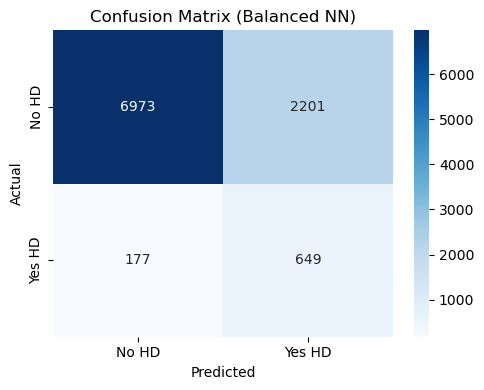

In [ ]:
# Predict
y_pred_prob = weighted_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

# Report
print("📊 Classification Report (With Class Weights):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=["No HD", "Yes HD"], yticklabels=["No HD", "Yes HD"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Balanced NN)")
plt.tight_layout()
plt.show()


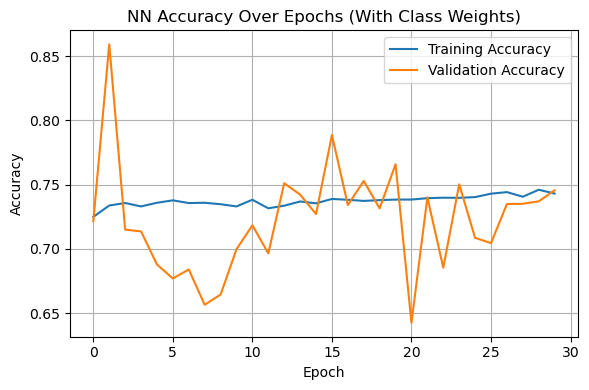

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(weighted_history.history['accuracy'], label='Training Accuracy')
plt.plot(weighted_history.history['val_accuracy'], label='Validation Accuracy')
plt.title("NN Accuracy Over Epochs (With Class Weights)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
